# 통합 데이터로 교통량 시각화

* 아직 데이터 내에 오류가 많아 데이터셋은 추후 수정 가능성이 필요

In [1]:
# 필요 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
# 데이터 불러오기
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/new_unite_drop_Na(6155).csv'
df = pd.read_csv(csvFile)
df.head()

,Unnamed: 0,교량명,시설물종별등급구분,최종안전점검일자,최종안전점검결과,시도명,시군구명,총길이,총교량폭,경간수,...,교량준공연도,준공후경과년수,설계활하중,교량시작점위도,교량시작점경도,교량종료점위도,교량종료점경도,교량연장,차로수,교통량
0,0,가남JCT육교(강릉),2,2021-12-22,B,경기도,여주군,225.0,16.2,5.0,...,1994,29.0,DB-24,37.232684,127.587146,37.232684,127.587146,225.0,3.0,24562.0
1,1,가남JCT육교(인천),2,2021-12-22,B,경기도,여주군,225.0,16.2,5.0,...,1994,29.0,DB-24,37.232684,127.587146,37.232684,127.587146,225.0,3.0,24562.0
2,2,가남교(강릉0),3,2021-10-29,B,경기도,여주군,25.0,19.3,1.0,...,2003,20.0,DB-24,37.237377,127.577557,37.237377,127.577557,25.0,5.0,61826.0
3,3,가남교(강릉1),3,2021-10-29,B,경기도,여주군,25.0,5.6,1.0,...,2010,13.0,DB-24,37.237377,127.577557,37.237377,127.577557,25.0,1.0,61826.0
4,4,가남교(인천),3,2021-10-29,B,경기도,여주군,25.0,19.3,1.0,...,2003,20.0,DB-24,37.237377,127.577557,37.237377,127.577557,25.0,4.0,61826.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6155 non-null   int64  
 1   교량명         6155 non-null   object 
 2   시설물종별등급구분   6155 non-null   object 
 3   최종안전점검일자    6155 non-null   object 
 4   최종안전점검결과    6155 non-null   object 
 5   시도명         6155 non-null   object 
 6   시군구명        6155 non-null   object 
 7   총길이         6155 non-null   float64
 8   총교량폭        6155 non-null   float64
 9   경간수         6155 non-null   float64
 10  최대경간장       6155 non-null   float64
 11  상부구조형식      6155 non-null   object 
 12  교량준공연도      6155 non-null   int64  
 13  준공후경과년수     6155 non-null   float64
 14  설계활하중       6155 non-null   object 
 15  교량시작점위도     6155 non-null   float64
 16  교량시작점경도     6155 non-null   float64
 17  교량종료점위도     6155 non-null   float64
 18  교량종료점경도     6155 non-null   float64
 19  교량연장        6155 non-null  

In [4]:
# 불필요한 컬럼 제거
drop_columns = ['Unnamed: 0', '최종안전점검일자',
       '총길이', '총교량폭', '경간수', '최대경간장','교량시작점위도',
       '교량시작점경도', '교량종료점위도', '교량종료점경도', '교량연장', '차로수']

In [5]:
df.drop(drop_columns, axis = 1, inplace = True)
df.head()

,교량명,시설물종별등급구분,최종안전점검결과,시도명,시군구명,상부구조형식,교량준공연도,준공후경과년수,설계활하중,교통량
0,가남JCT육교(강릉),2,B,경기도,여주군,강박스거더교,1994,29.0,DB-24,24562.0
1,가남JCT육교(인천),2,B,경기도,여주군,강박스거더교,1994,29.0,DB-24,24562.0
2,가남교(강릉0),3,B,경기도,여주군,프리플렉스거더교,2003,20.0,DB-24,61826.0
3,가남교(강릉1),3,B,경기도,여주군,PSCI거더교,2010,13.0,DB-24,61826.0
4,가남교(인천),3,B,경기도,여주군,프리플렉스거더교,2003,20.0,DB-24,61826.0


In [6]:
# 교통량 데이터타입 변경
df['교통량'] = df['교통량'].astype(int)

In [7]:
# 준공 후 경과년수에 따른 교통량 합계

def category_year(myYear):
    if myYear < 5:
        return '5년 미만'
    elif myYear < 10:
        return '5년 이상 10년 미만'
    elif myYear < 15:
        return '10년 이상 15년 미만'
    elif myYear < 20:
        return '15년 이상 20년 미만'
    elif myYear < 25:
        return '20년 이상 25년 미만'
    else:
        return '25년 이상'

In [8]:
df['Cum_year'] = df['준공후경과년수'].apply(lambda x: category_year(x))

In [9]:
# 준공 후 경과년수별 교통량평균 확인
mean_Cumyear = df[['Cum_year', '교통량']].groupby(['Cum_year'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_Cumyear

,Cum_year,교통량
0,20년 이상 25년 미만,41423.629972
1,25년 이상,40144.014878
2,10년 이상 15년 미만,34655.950461
3,15년 이상 20년 미만,32922.904888
4,5년 미만,30698.486486
5,5년 이상 10년 미만,26375.750000


준공 후 경과년수에 따라 평균적인 교통량의 추이를 파악할 수 있다.

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\3873668749.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


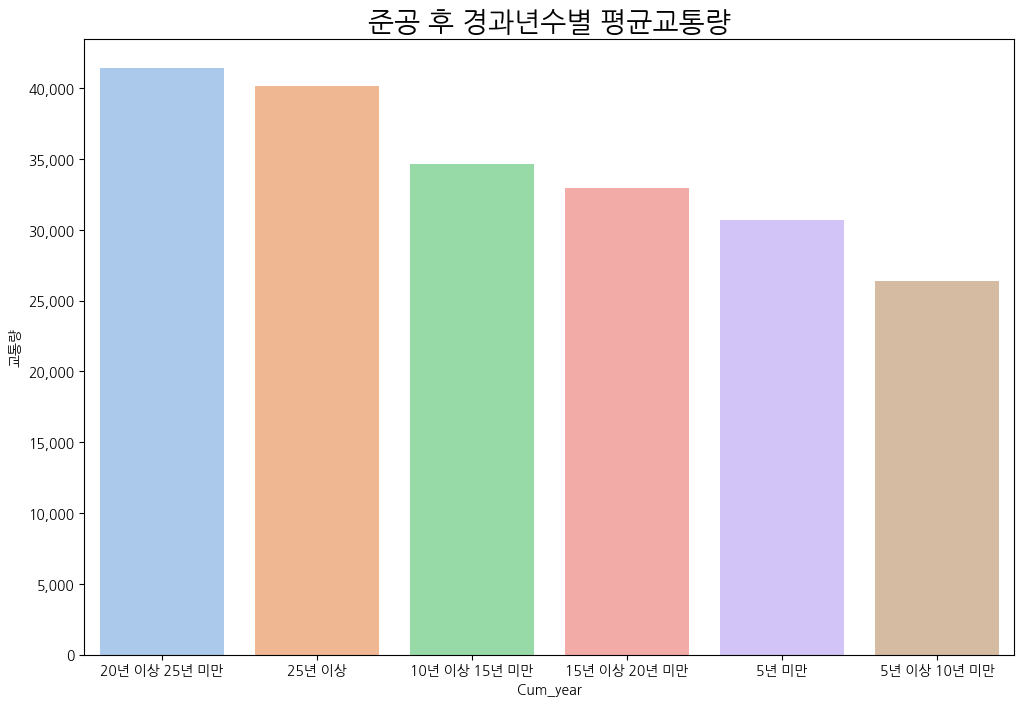

In [10]:
# 준공 후 경과년수별 교통량평균 그래프 확인
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Cum_year', y = '교통량', palette = 'pastel', data = mean_Cumyear)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('준공 후 경과년수별 평균교통량', fontsize = 20)
plt.show()

In [11]:
# 상부구조별 교통량합계 확인(범주화를 하지 않음)
mean_structure = df[['상부구조형식', '교통량']].groupby(['상부구조형식'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_structure

,상부구조형식,교통량
0,RC중공슬래브교,57384.351064
1,프리플렉스거더교,47704.333333
2,강플레이트거더교,45713.295775
3,PSC박스거더교,41726.008333
4,강박스거더교,41254.739715
5,엑스트라도즈드교,37930.000000
6,라멘교,36445.973896
7,아치교,36004.872340
8,RC박스거더교,34719.250000
9,PSC중공슬래브교,34062.541667


C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\624503548.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


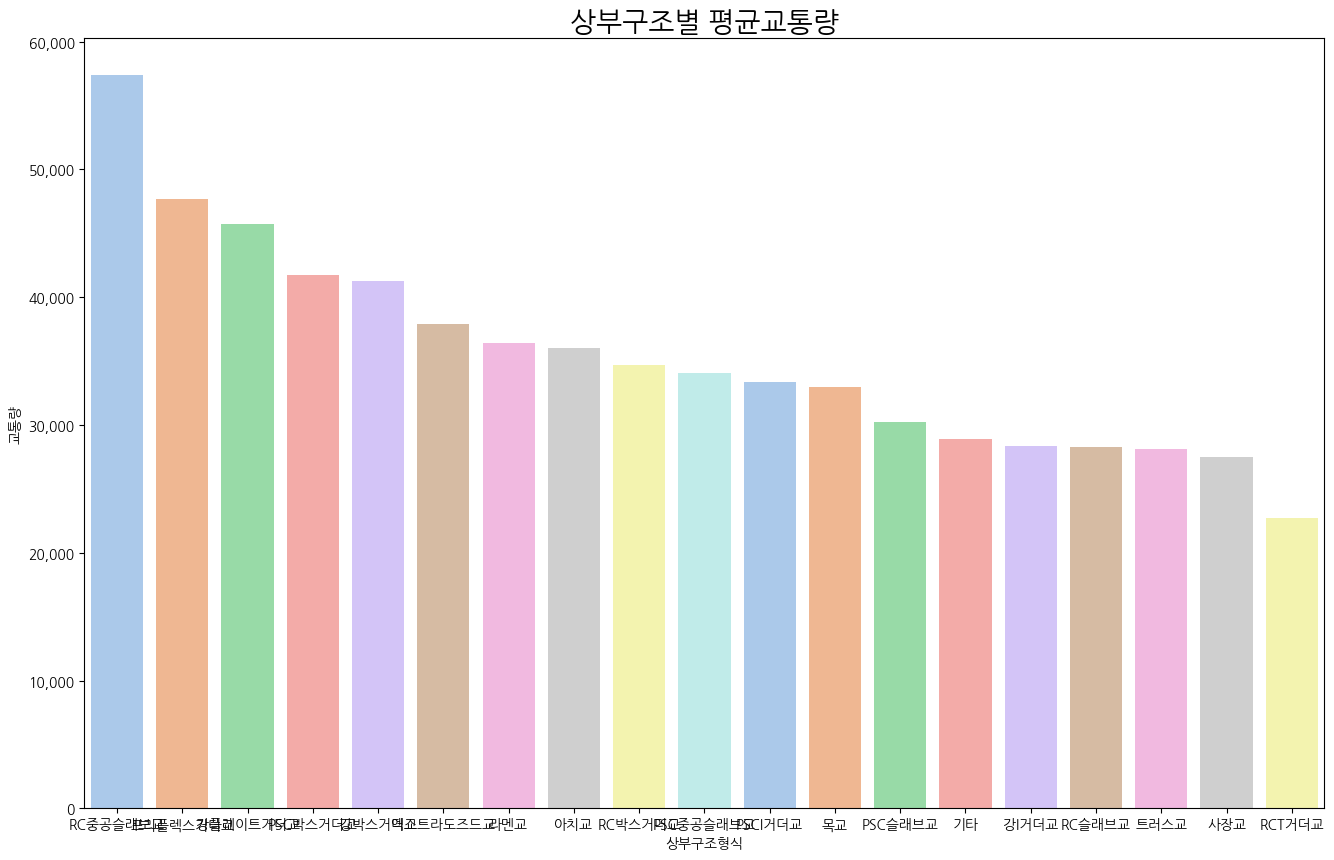

In [12]:
# 상부구조별 교통량평균 그래프 확인
plt.figure(figsize = (16, 10))
sns.barplot(x = '상부구조형식', y = '교통량', palette = 'pastel', data = mean_structure)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\301667733.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


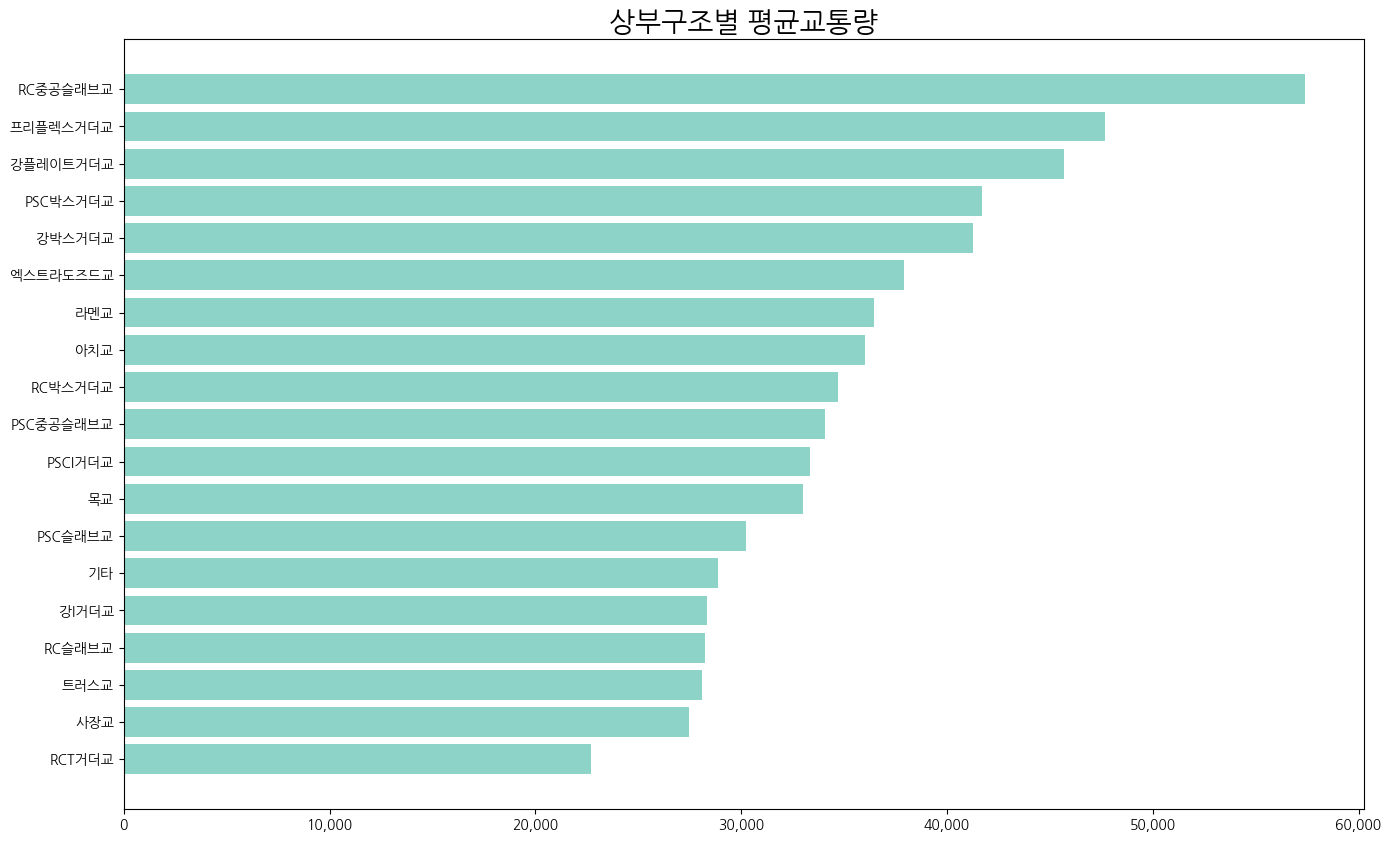

In [13]:
# 상부구조별 교통량평균 가로그래프 확인
sns.set_palette("Set3")
plt.figure(figsize = (16, 10))
mean_st = mean_structure.sort_values(by = '교통량', ascending = True)
plt.barh(mean_st['상부구조형식'], mean_st['교통량'])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별 평균교통량', fontsize = 20)

plt.show()

In [14]:
# 큰 항목만을 묶어서 범주화
def category_struc(struc):
    if struc.endswith('거더교'):
        return '거더교'
    elif struc.endswith('슬래브교'):
        return '슬래브교'
    elif struc.endswith('라멘교'):
        return '라멘교'
    elif struc.endswith('사장교'):
        return '사장교'
    elif struc.endswith('아치교'):
        return '아치교'
    elif struc.endswith('트러스트교'):
        return '트러스트교'
    else:
        return '기타'

In [15]:
df['New_Struc'] = df['상부구조형식'].apply(lambda x: category_struc(x))

In [16]:
# 새로운 상부구조별 교통량평균 확인
mean_structure = df[['New_Struc', '교통량']].groupby(['New_Struc'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_structure

,New_Struc,교통량
0,거더교,38280.961779
1,라멘교,36445.973896
2,아치교,36004.872340
3,슬래브교,30830.194305
4,기타,29125.577982
5,사장교,27477.300000


* 상부구조를 큰 범위로 묶어 큰 범주별 평균 교통량을 확인

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\2725184163.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


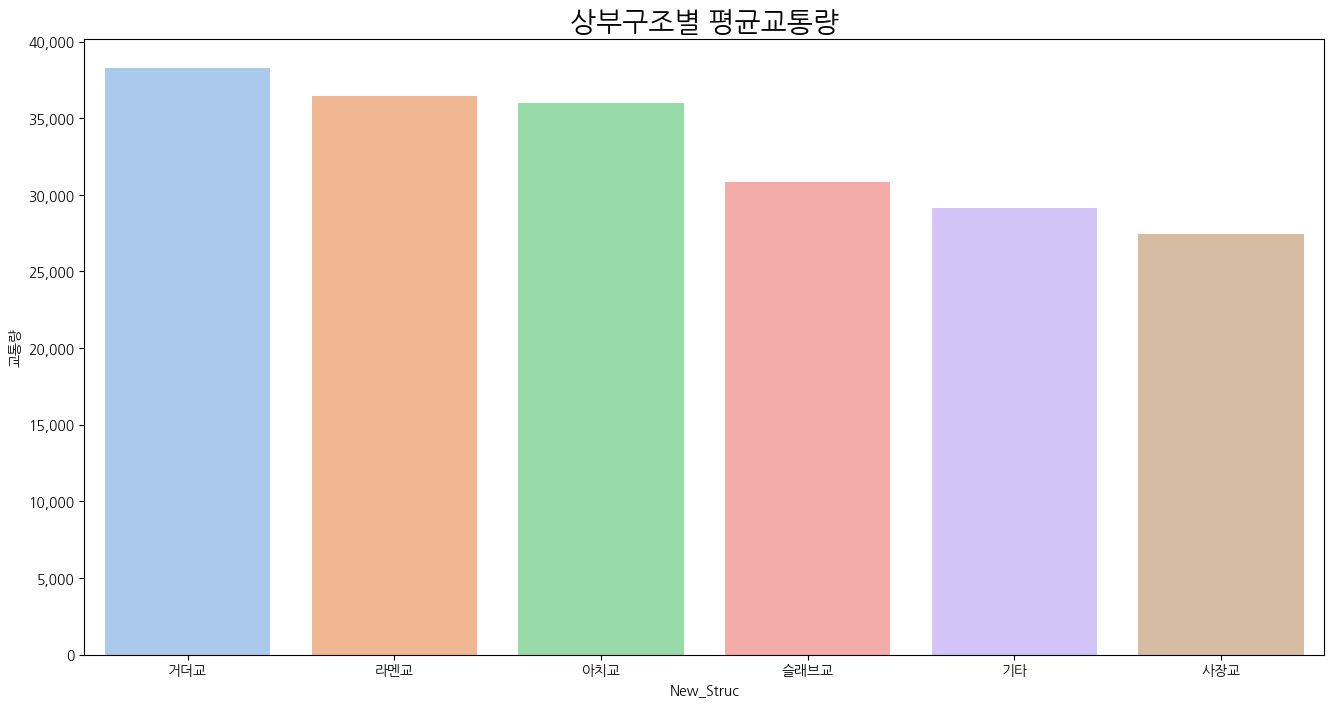

In [17]:
# 새로운 상부구조별 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Struc', y = '교통량', palette = 'pastel', data = mean_structure)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별 평균교통량', fontsize = 20)
plt.show()

In [18]:
# 새로운 시설물 등급컬럼 생성
# 1, 2, 3종 이외는 기타로 통합
def new_facility(facility):
    if facility == '1':
        return '1종 시설물'
    elif facility == '2':
        return '2종 시설물'
    elif facility == '3':
        return '3종 시설물'
    else:
        return '기타'

In [19]:
df['New_facility'] = df['시설물종별등급구분'].apply(lambda x: new_facility(x))

In [20]:
# 시설물등급에 따른 교통량평균
mean_facility = df[['New_facility', '교통량']].groupby(['New_facility'], as_index = False).mean()
mean_facility

,New_facility,교통량
0,1종 시설물,42189.500000
1,2종 시설물,33629.969466
2,3종 시설물,37437.376528
3,기타,33357.948755


C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\1605370791.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


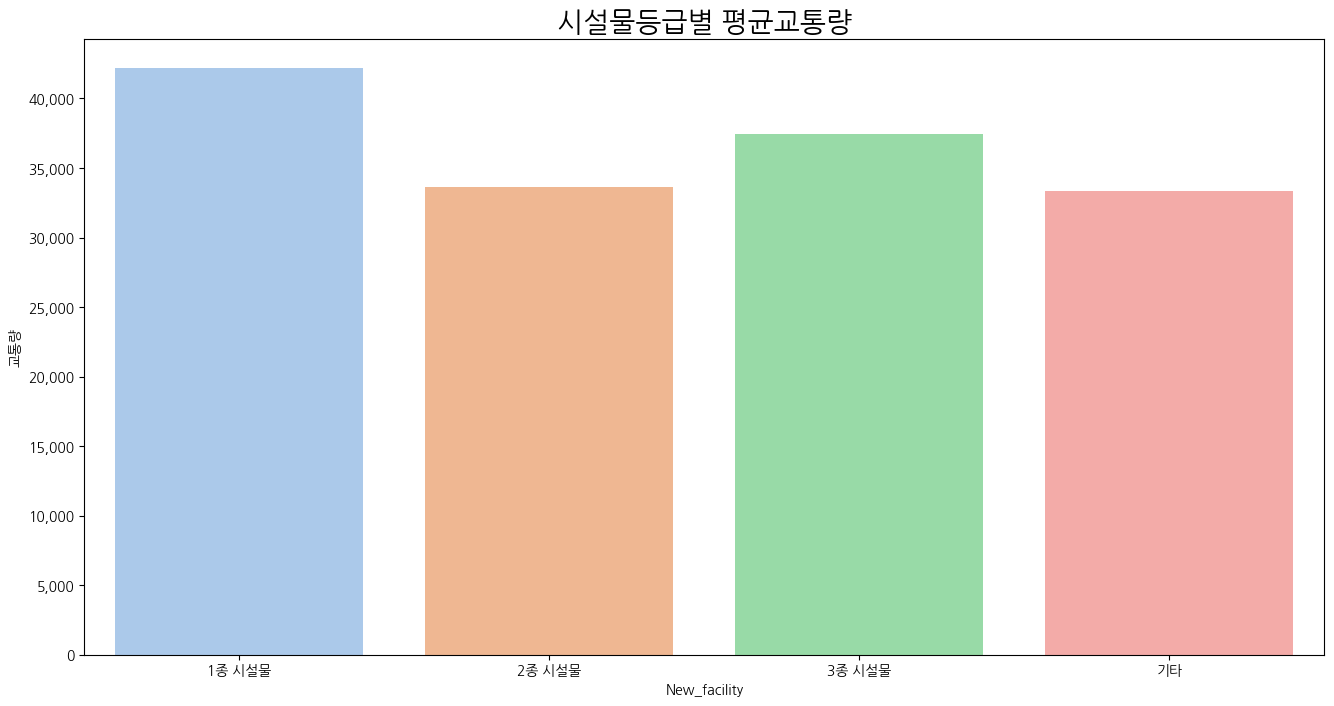

In [21]:
# 시설물등급에 따른 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_facility', y = '교통량', palette = 'pastel', data = mean_facility)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('시설물등급별 평균교통량', fontsize = 20)
plt.show()

In [22]:
# 안전등급에 따른 평균교통량
mean_grade = df[['최종안전점검결과', '교통량']].groupby(['최종안전점검결과'], as_index = False).mean()
mean_grade

,최종안전점검결과,교통량
0,A,31199.988220
1,B,37324.063591
2,C,29014.452381
3,D,33012.000000
4,E,51390.746269


C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\2657306575.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


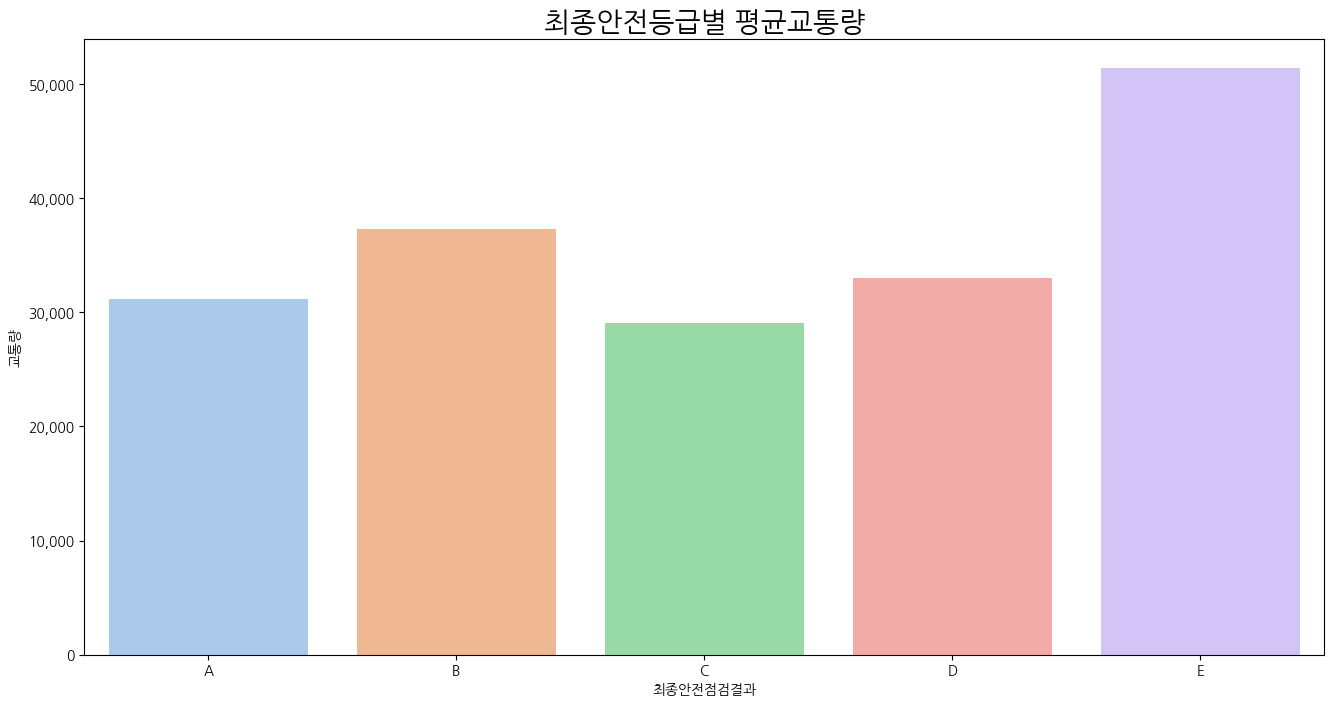

In [23]:
# 시설물등급에 따른 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = '최종안전점검결과', y = '교통량', palette = 'pastel', data = mean_grade)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('최종안전등급별 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\3429579179.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


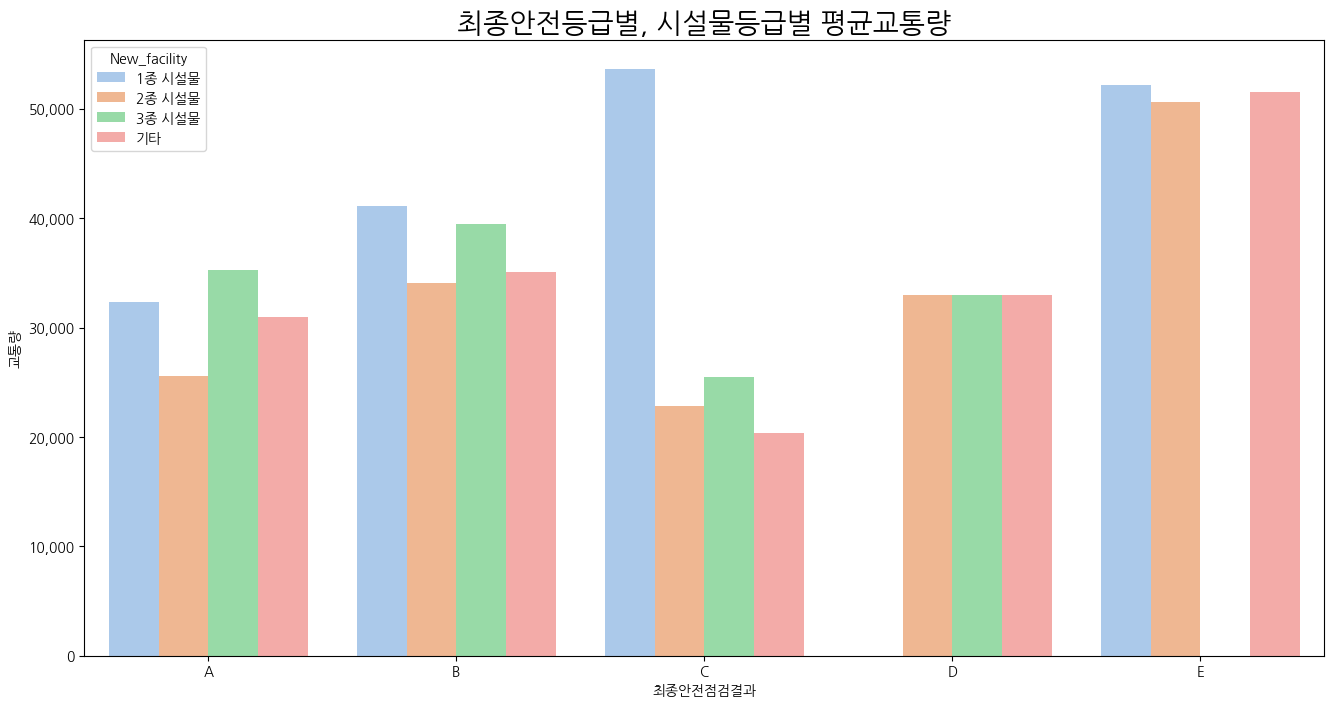

In [24]:
# 최종안전등급별, 시설물등급별 평균교통량 확인

plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'D', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = 'New_facility', palette = 'pastel', data = df, order = group_name,
            errorbar = None, hue_order = ['1종 시설물', '2종 시설물', '3종 시설물', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('최종안전등급별, 시설물등급별 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\3407730555.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


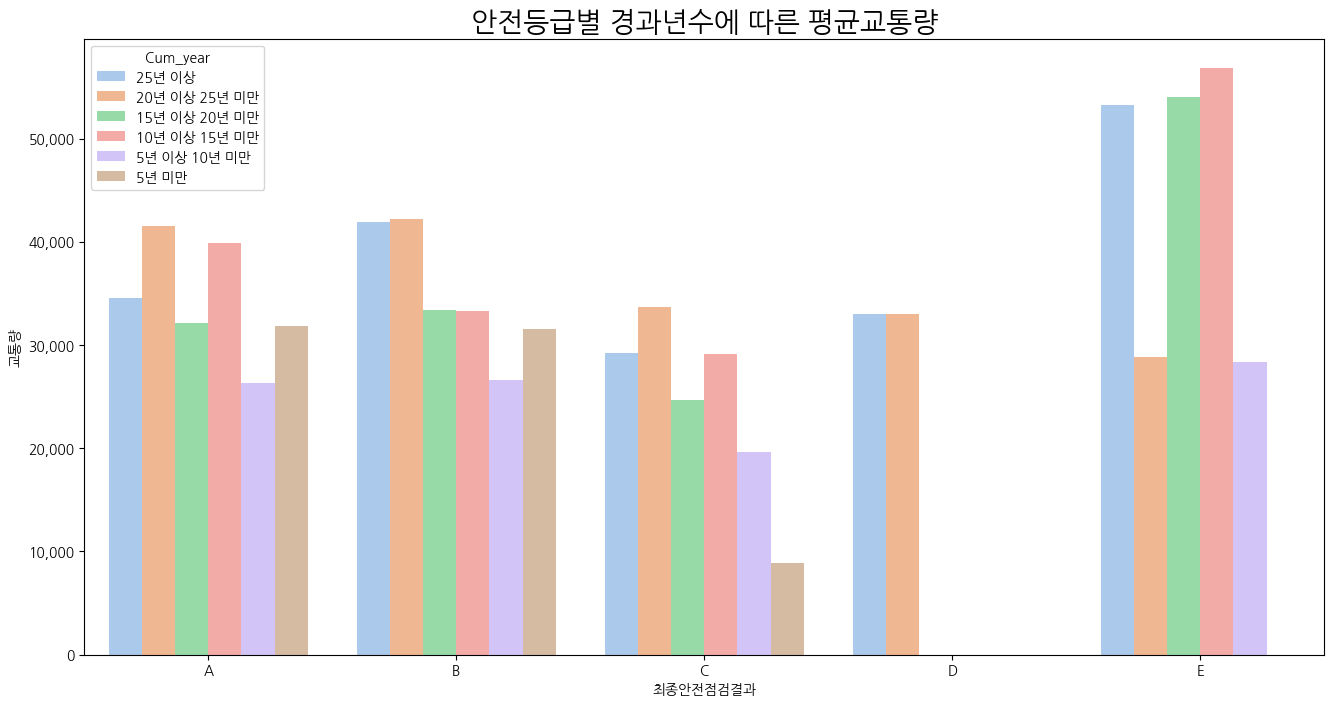

In [25]:
# 안전등급, 경과년수별에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'D', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = 'Cum_year', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['25년 이상', '20년 이상 25년 미만', '15년 이상 20년 미만', '10년 이상 15년 미만', '5년 이상 10년 미만', '5년 미만'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('안전등급별 경과년수에 따른 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\1394570547.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


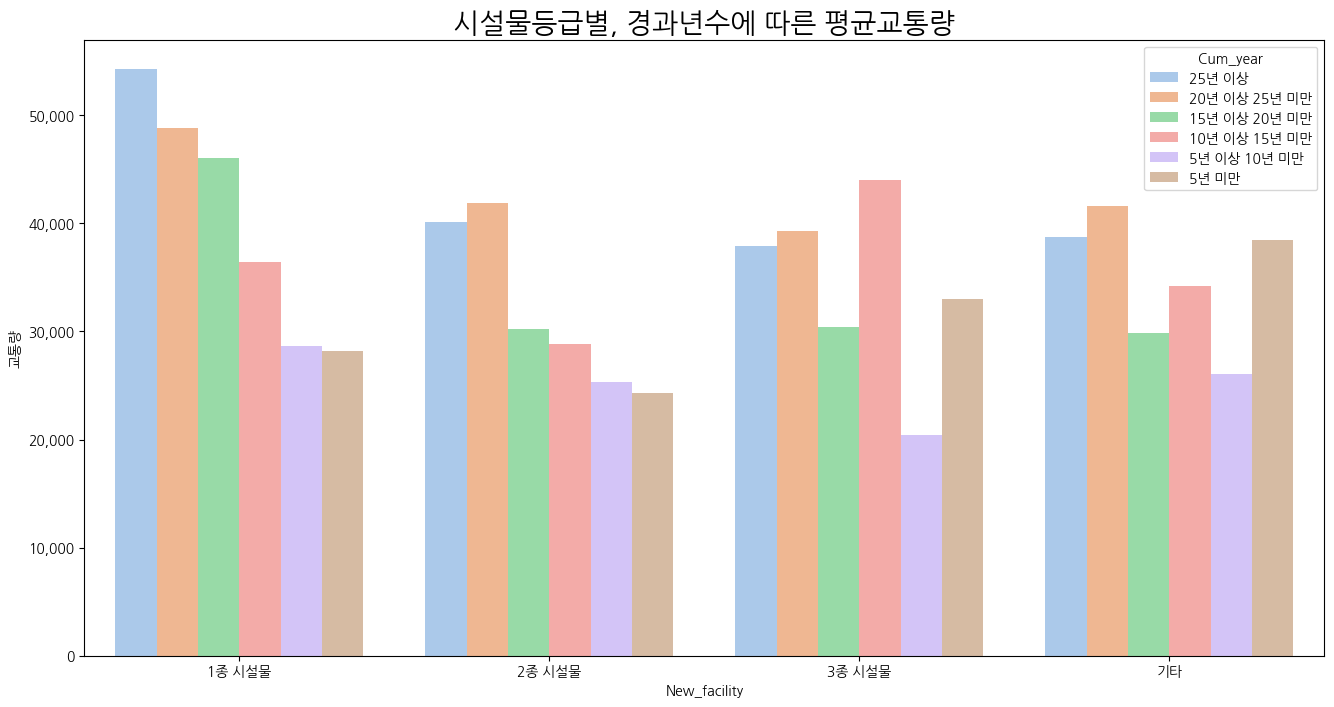

In [26]:
# 시설물등급, 경과년수에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['1종 시설물', '2종 시설물', '3종 시설물', '기타']
sns.barplot(x = 'New_facility', y = '교통량', hue = 'Cum_year', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['25년 이상', '20년 이상 25년 미만', '15년 이상 20년 미만', '10년 이상 15년 미만', '5년 이상 10년 미만', '5년 미만'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('시설물등급별, 경과년수에 따른 평균교통량', fontsize = 20)
plt.show()

* 추후에 데이터를 합치는 과정에서 교통량 결측치를 제거후 재진행하면 보다 깔끙한 그래프가 도출될것으로 예상

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\1261967803.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


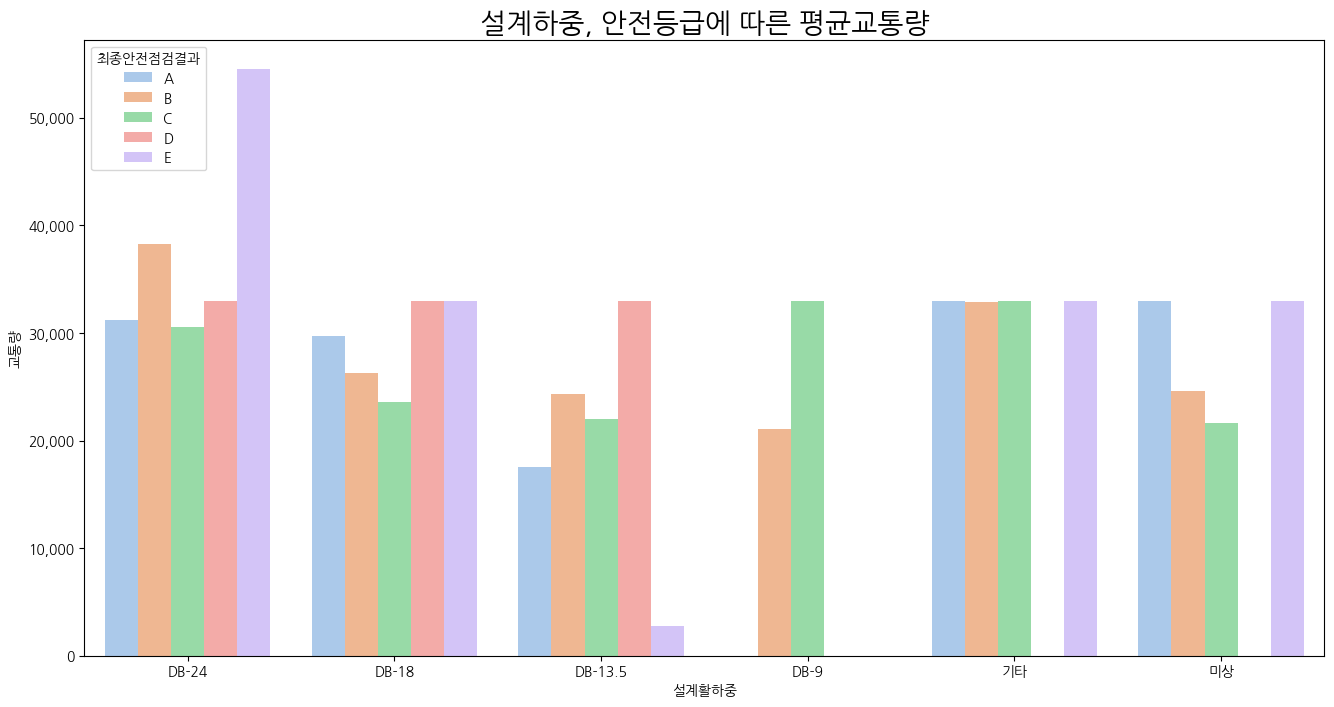

In [27]:
# 설계하중, 안전등급에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타', '미상']
sns.barplot(x = '설계활하중', y = '교통량', hue = '최종안전점검결과', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['A', 'B', 'C', 'D', 'E'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('설계하중, 안전등급에 따른 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\2157314910.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


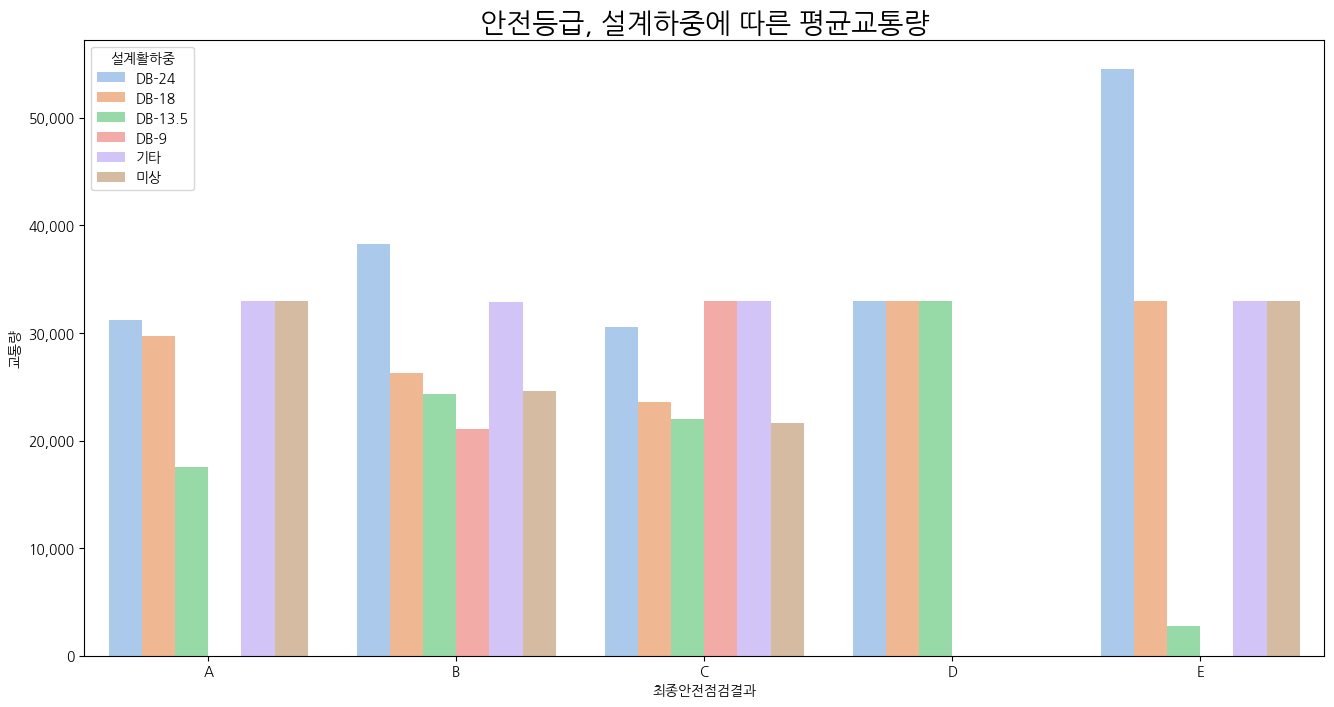

In [28]:
# 안전등급, 설계하중에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'D', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = '설계활하중', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['DB-24', 'DB-18', 'DB-13.5', 'DB-9', '기타', '미상'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('안전등급, 설계하중에 따른 평균교통량', fontsize = 20)
plt.show()

In [29]:
# 새로운 설계하중별 교통량
def category_weight(weight):
    if weight == 'DB-24':
        return '1등교'
    elif weight == 'DB-18':
        return '2등교'
    elif weight == 'DB-13.5':
        return '3등교'
    else:
        return '기타'

In [30]:
df['New_Weight'] = df['설계활하중'].apply(lambda x: category_weight(x))

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\484827244.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


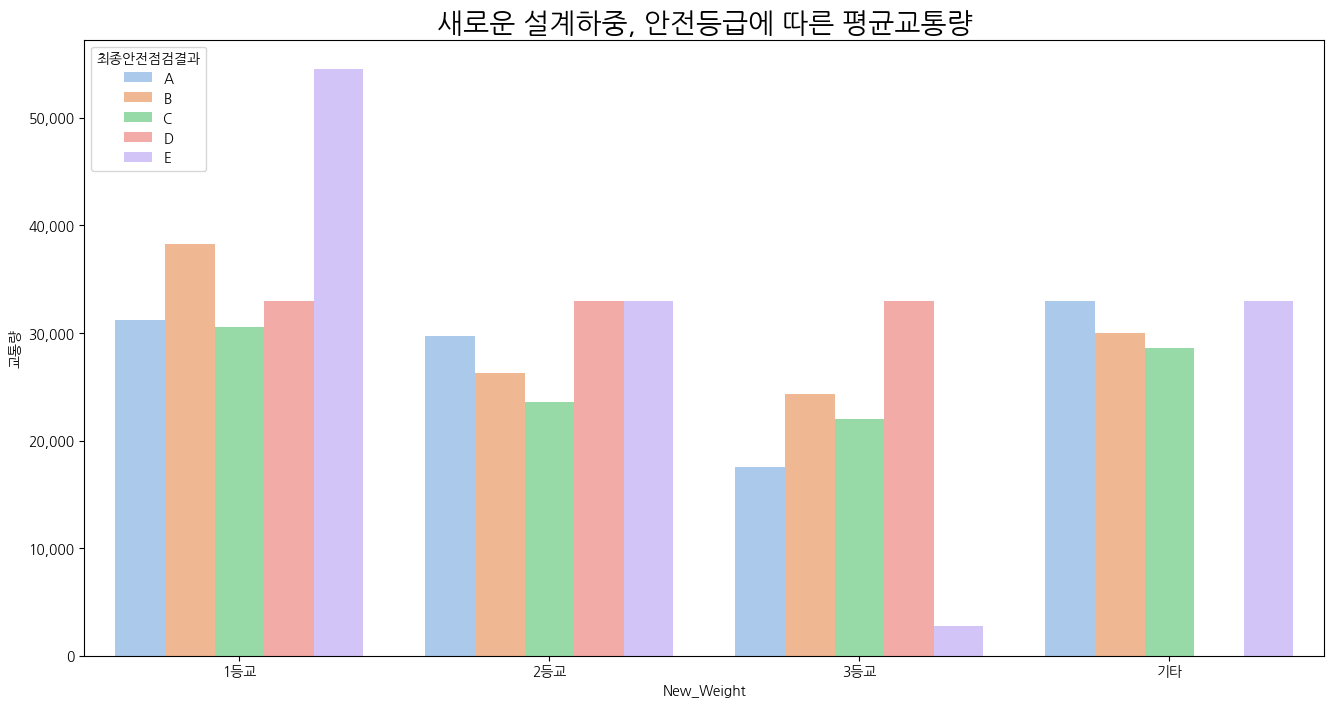

In [31]:
# 새로운 설계하중, 안전등급에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['1등교', '2등교', '3등교', '기타']
sns.barplot(x = 'New_Weight', y = '교통량', hue = '최종안전점검결과', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['A', 'B', 'C', 'D', 'E'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('새로운 설계하중, 안전등급에 따른 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\852338991.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


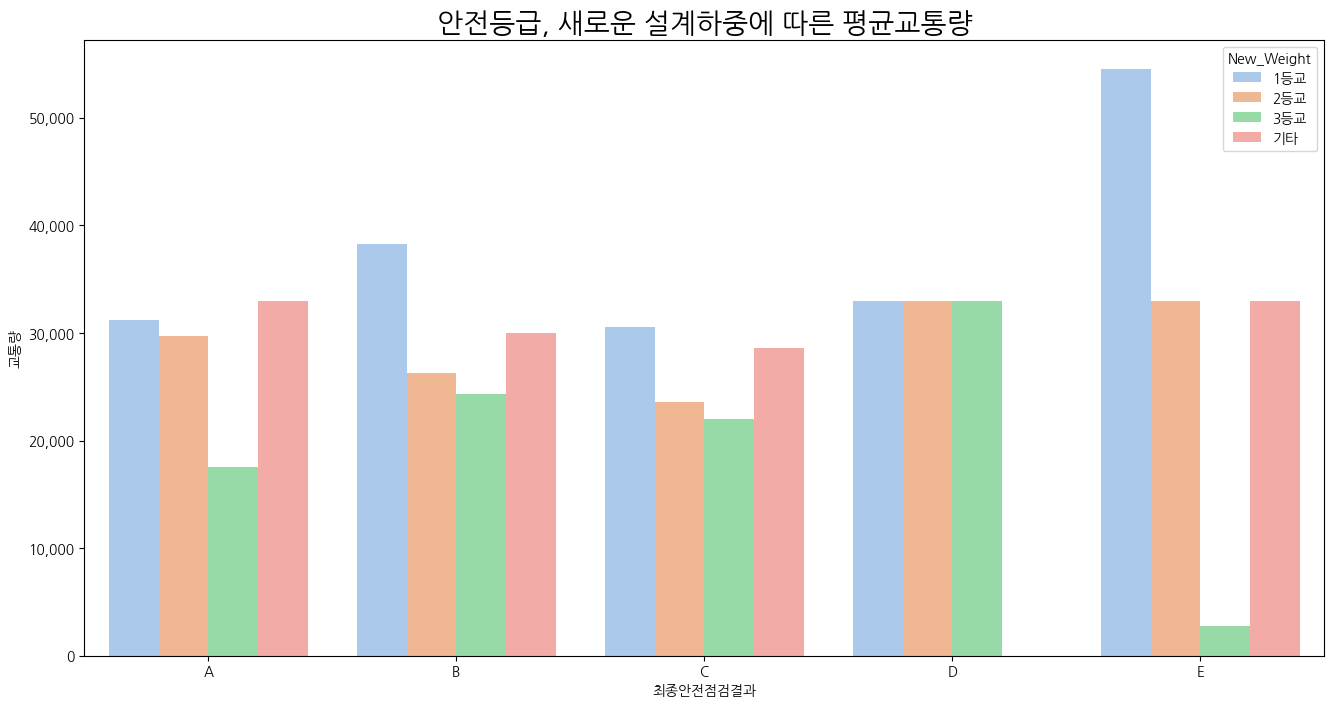

In [32]:
# 안전등급, 설계하중에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'D', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = 'New_Weight', palette = 'pastel', data = df, order = group_name, errorbar = None,
            hue_order = ['1등교', '2등교', '3등교', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('안전등급, 새로운 설계하중에 따른 평균교통량', fontsize = 20)
plt.show()

# 지역별로 교통량 알아보기

In [33]:
# 서울시 군구별 교통량 알아보기
seoul_df = df[df['시도명'] == '서울특별시']
seoul_df.reset_index(drop = True, inplace = True)
seoul_df.head()

,교량명,시설물종별등급구분,최종안전점검결과,시도명,시군구명,상부구조형식,교량준공연도,준공후경과년수,설계활하중,교통량,Cum_year,New_Struc,New_facility,New_Weight
0,강동대교(구리0),1,C,서울특별시,강동구,PSC박스거더교,1991,32.0,DB-24,84424,25년 이상,거더교,1종 시설물,1등교
1,강동대교(구리1),1,C,서울특별시,강동구,PSC박스거더교,1991,32.0,DB-24,84424,25년 이상,거더교,1종 시설물,1등교
2,강동대교(판교),1,B,서울특별시,강동구,PSC박스거더교,2002,21.0,DB-24,84424,20년 이상 25년 미만,거더교,1종 시설물,1등교
3,강일IC1교,3,B,서울특별시,강동구,PSC슬래브교,2009,14.0,DB-24,84424,10년 이상 15년 미만,슬래브교,3종 시설물,1등교
4,강일IC2교,2,B,서울특별시,강동구,강박스거더교,2002,21.0,DB-24,84424,20년 이상 25년 미만,거더교,2종 시설물,1등교


In [34]:
# 서울특별시 군구별 평균교통량
mean_seoul = seoul_df[['시군구명', '교통량']].groupby(['시군구명'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_seoul

,시군구명,교통량
0,강동구,78764.933333
1,송파구,64436.166667
2,용산구,51801.958333
3,서초구,48808.571429
4,노원구,36993.444444
5,성동구,36137.105263
6,금천구,33602.800000
7,영등포구,33033.818182
8,동작구,33012.000000
9,양천구,33012.000000


C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\3224875720.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


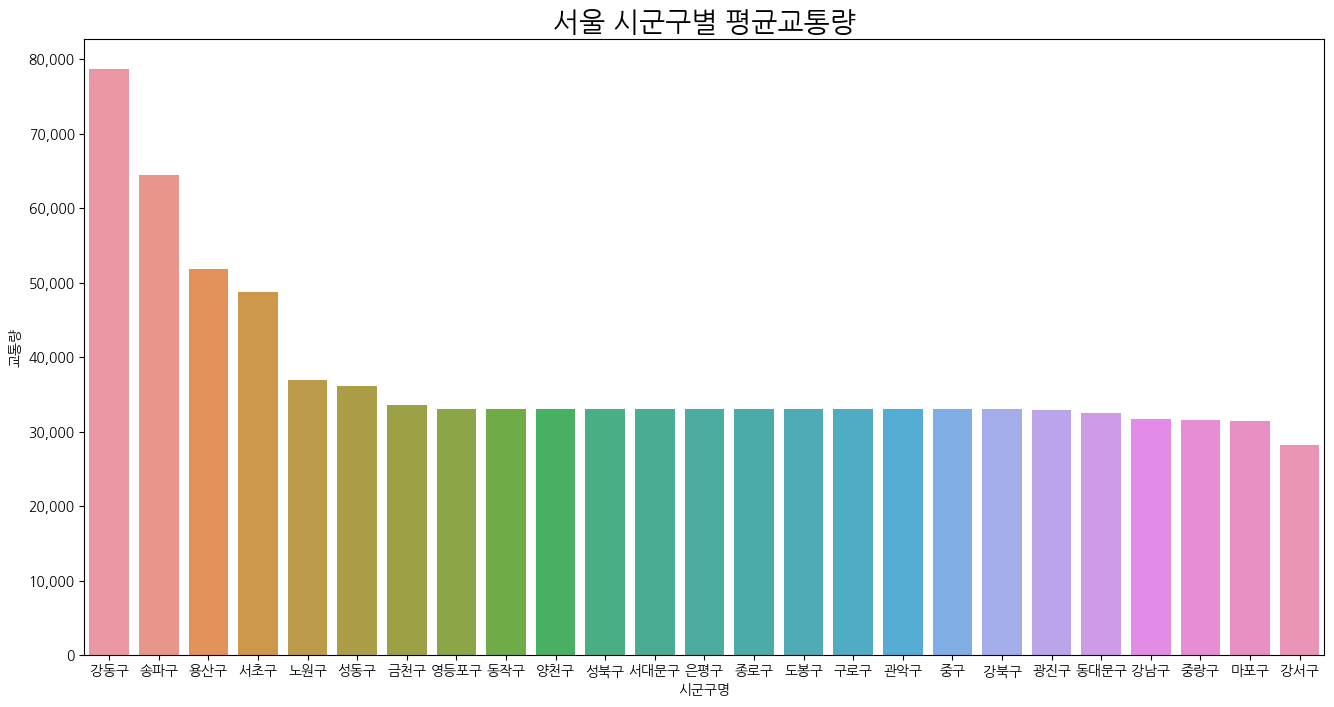

In [35]:
# 시군구별 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = '시군구명', y = '교통량', data = mean_seoul)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('서울 시군구별 평균교통량', fontsize = 20)
plt.show()

In [36]:
# 경기도 군구별 교통량 알아보기
gyeonggi_df = df[df['시도명'] == '경기도']
gyeonggi_df.reset_index(drop = True, inplace = True)
gyeonggi_df.head()

,교량명,시설물종별등급구분,최종안전점검결과,시도명,시군구명,상부구조형식,교량준공연도,준공후경과년수,설계활하중,교통량,Cum_year,New_Struc,New_facility,New_Weight
0,가남JCT육교(강릉),2,B,경기도,여주군,강박스거더교,1994,29.0,DB-24,24562,25년 이상,거더교,2종 시설물,1등교
1,가남JCT육교(인천),2,B,경기도,여주군,강박스거더교,1994,29.0,DB-24,24562,25년 이상,거더교,2종 시설물,1등교
2,가남교(강릉0),3,B,경기도,여주군,프리플렉스거더교,2003,20.0,DB-24,61826,20년 이상 25년 미만,거더교,3종 시설물,1등교
3,가남교(강릉1),3,B,경기도,여주군,PSCI거더교,2010,13.0,DB-24,61826,10년 이상 15년 미만,거더교,3종 시설물,1등교
4,가남교(인천),3,B,경기도,여주군,프리플렉스거더교,2003,20.0,DB-24,61826,20년 이상 25년 미만,거더교,3종 시설물,1등교


In [37]:
# 경기도 군구별 평균교통량
mean_gyeonggi = gyeonggi_df[['시군구명', '교통량']].groupby(['시군구명'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_gyeonggi

,시군구명,교통량
0,부천시 소사구,112254.000000
1,부천시 원미구,110469.750000
2,화성군,96020.000000
3,안성군,91547.000000
4,부천시 오정구,86540.400000
5,성남시 수정구,77983.031915
6,하남시,72079.584906
7,용인시,70789.170213
8,수원시 장안구,67788.535714
9,용인시 기흥구,66818.409722


C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\1086031626.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


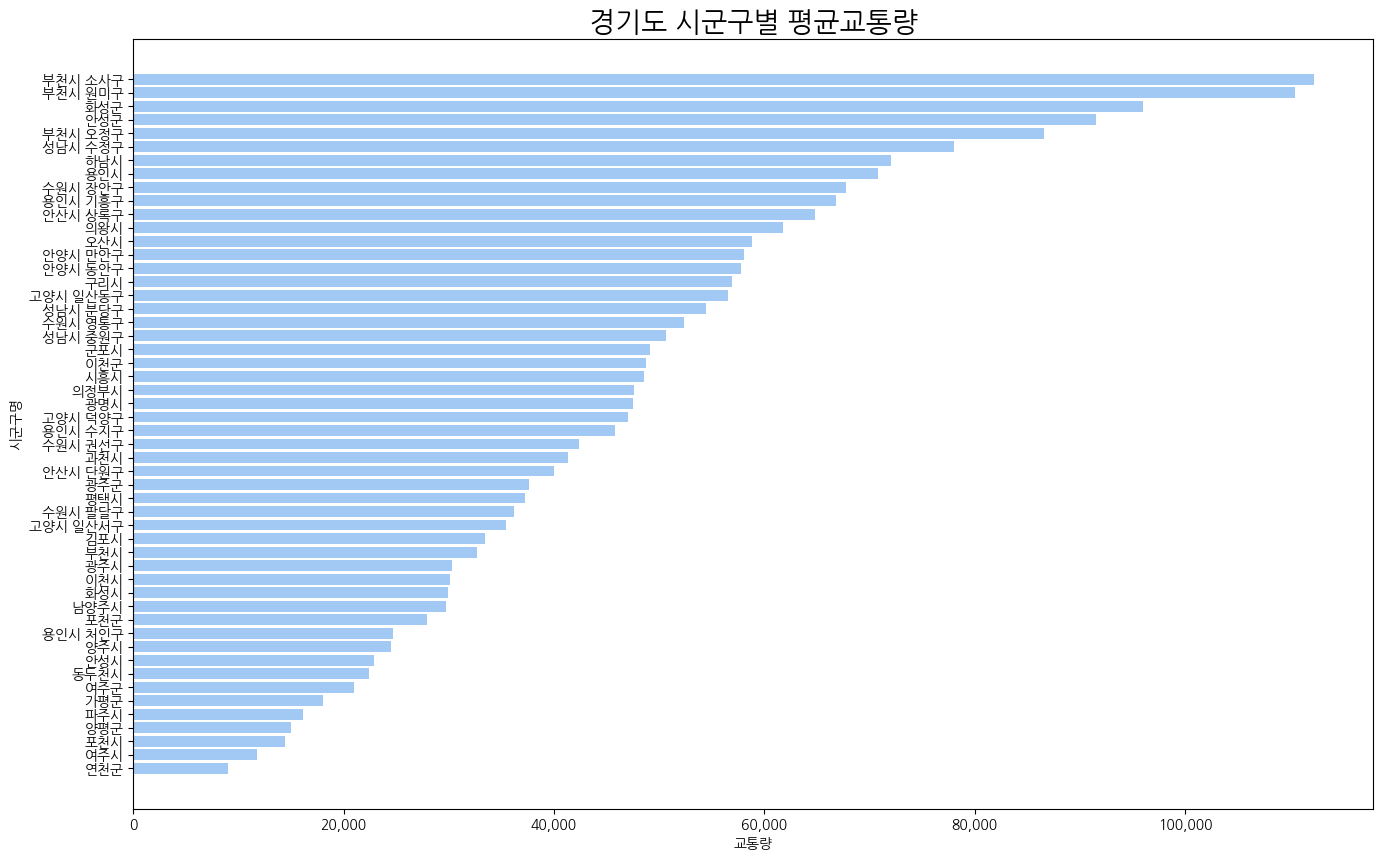

In [38]:
# 시군구별 교통량평균 그래프 확인
plt.figure(figsize = (16, 10))
sns.set_palette("pastel")
gy_df = mean_gyeonggi.sort_values(by = '교통량', ascending = True)
plt.barh(gy_df['시군구명'], gy_df['교통량'])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('경기도 시군구별 평균교통량', fontsize = 20)
plt.xlabel('교통량')
plt.ylabel('시군구명')
plt.show()

# 자동차 등록대수 현황 파악

## 연도별 차량등록대수 현황 시각화

In [39]:
# 1990~2014년 데이터 살펴보기
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/자동차등록대수현황_연도별 (1990 ~ 2014).csv'
df1 = pd.read_csv(csvFile, usecols = [0, 5, 9, 13, 17], header = 1, encoding = 'euc-kr')
df1.head()

,년(Annual),Unnamed: 5,Unnamed: 9,Unnamed: 13,Unnamed: 17
0,1990,2074922,383738,924647,11496
1,1994,5148713,582069,1644646,28919
2,1995,6006290,612584,1816582,33445
3,1996,6893633,663011,1962564,33884
4,1997,7586474,719127,2072256,35570


In [40]:
# 데이터 컬럼명 변경
df1.columns = ['년(Annual)', '승용차 합계', '승합차 합계', '화물차 합계', '특수차 합계']

In [41]:
df1.head()

,년(Annual),승용차 합계,승합차 합계,화물차 합계,특수차 합계
0,1990,2074922,383738,924647,11496
1,1994,5148713,582069,1644646,28919
2,1995,6006290,612584,1816582,33445
3,1996,6893633,663011,1962564,33884
4,1997,7586474,719127,2072256,35570


In [42]:
# 2015 ~ 2022년 데이터 살펴보기
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/자동차등록대수현황_연도별 (2015~ 2022).csv'
df2 = pd.read_csv(csvFile, usecols = [0, 4, 8, 12, 16], header = 1, encoding = 'euc-kr')
df2.head()

,년(Annual),계,계.1,계.2,계.3
0,2015,16561665,920320,3432937,74963
1,2016,17338160,892539,3492173,80479
2,2017,18034540,867522,3540323,85910
3,2018,18676924,843794,3590939,90898
4,2019,19177517,811799,3592586,95464


In [43]:
# 데이터 컬럼명 변경
df2.columns = ['년(Annual)', '승용차 합계', '승합차 합계', '화물차 합계', '특수차 합계']
df2.head()

,년(Annual),승용차 합계,승합차 합계,화물차 합계,특수차 합계
0,2015,16561665,920320,3432937,74963
1,2016,17338160,892539,3492173,80479
2,2017,18034540,867522,3540323,85910
3,2018,18676924,843794,3590939,90898
4,2019,19177517,811799,3592586,95464


In [44]:
# 두 데이터 concat으로 병합
concat_df = pd.concat([df1, df2], sort = False, axis = 0)
concat_df.head()

,년(Annual),승용차 합계,승합차 합계,화물차 합계,특수차 합계
0,1990,2074922,383738,924647,11496
1,1994,5148713,582069,1644646,28919
2,1995,6006290,612584,1816582,33445
3,1996,6893633,663011,1962564,33884
4,1997,7586474,719127,2072256,35570


In [45]:
concat_df.tail()

,년(Annual),승용차 합계,승합차 합계,화물차 합계,특수차 합계
3,2018,18676924,843794,3590939,90898
4,2019,19177517,811799,3592586,95464
5,2020,19860955,783842,3615245,105937
6,2021,20410648,749968,3631975,118510
7,2022,20952759,723961,3696317,130041


In [46]:
# 인덱스 재정렬
concat_df.reset_index(drop = True, inplace = True)

In [47]:
concat_df.tail()

,년(Annual),승용차 합계,승합차 합계,화물차 합계,특수차 합계
25,2018,18676924,843794,3590939,90898
26,2019,19177517,811799,3592586,95464
27,2020,19860955,783842,3615245,105937
28,2021,20410648,749968,3631975,118510
29,2022,20952759,723961,3696317,130041


In [48]:
# csv로 저장
concat_df.to_csv('concat_car.csv', index = False, encoding = 'utf-8-sig')

## 합친 데이터로 시각화

In [49]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   년(Annual)  30 non-null     int64
 1   승용차 합계     30 non-null     int64
 2   승합차 합계     30 non-null     int64
 3   화물차 합계     30 non-null     int64
 4   특수차 합계     30 non-null     int64
dtypes: int64(5)
memory usage: 1.3 KB


C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\3454323094.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


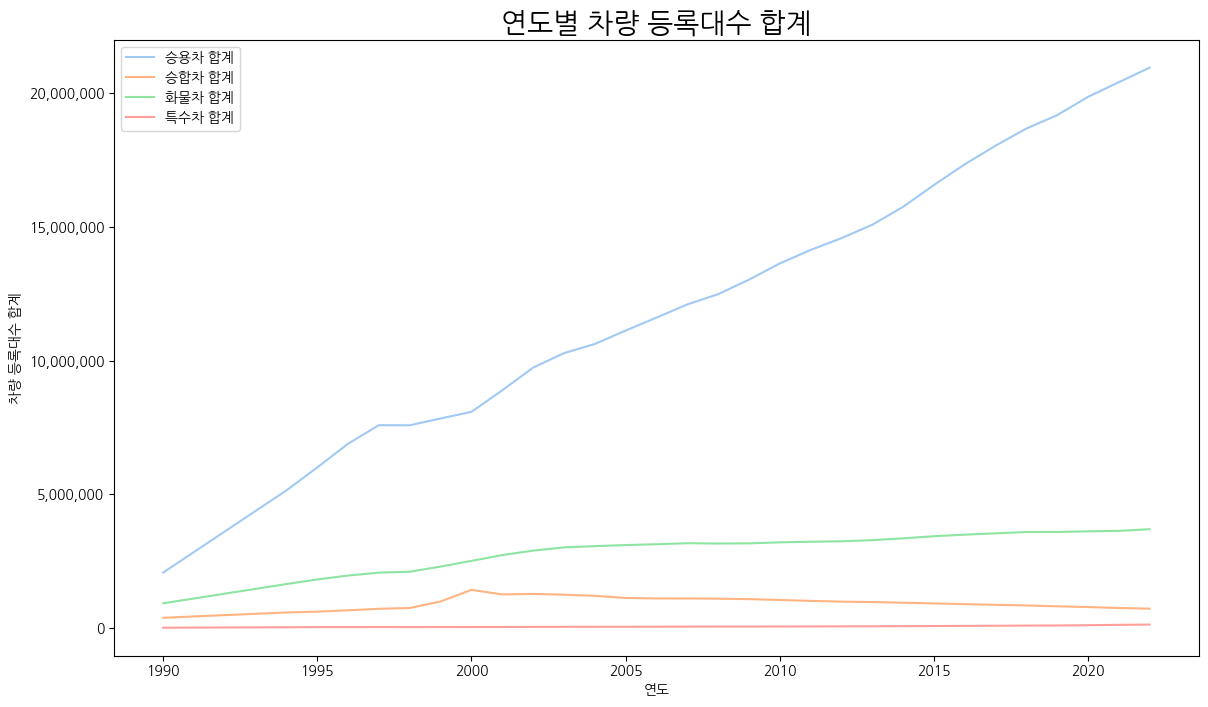

In [50]:
# 합친 데이터를 토대로 연도별 차량의 등록 합계 시각화
sns.set_palette("pastel")
concat_df.plot(x = '년(Annual)', kind = 'line', figsize = (14, 8))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('연도')
plt.ylabel('차량 등록대수 합계')
plt.title('연도별 차량 등록대수 합계', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\245022622.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


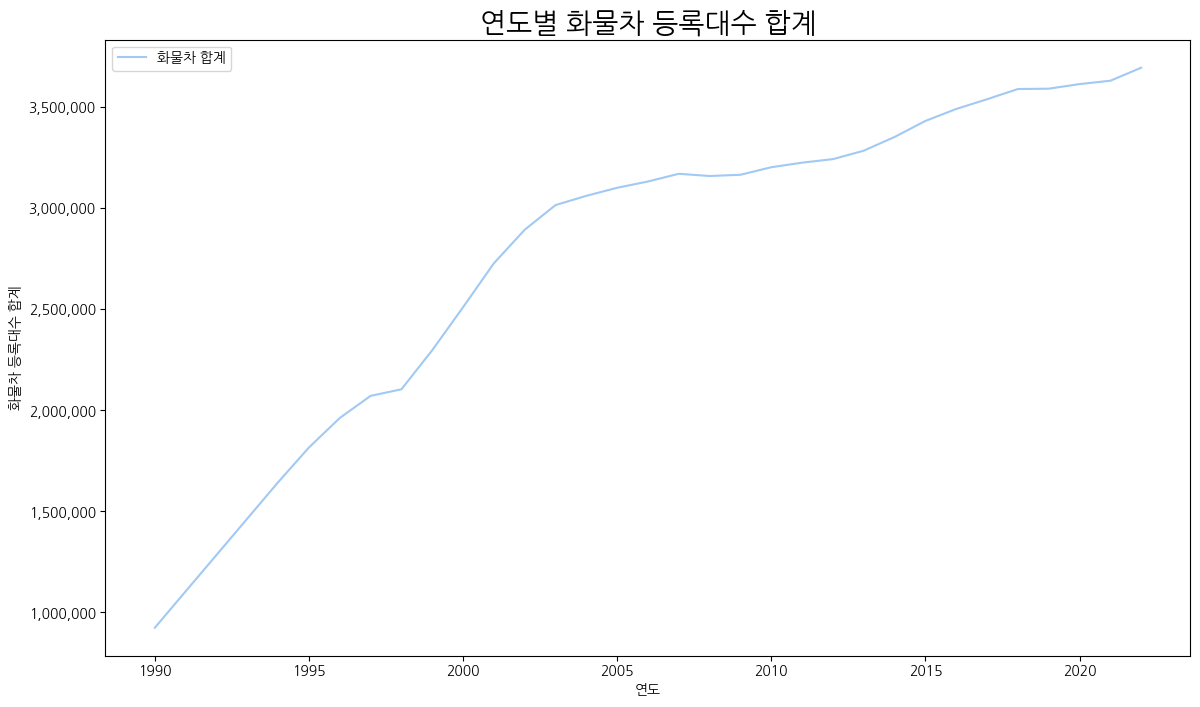

In [51]:
# 화물차만 따로 시각화
sns.set_palette("pastel")
concat_df.plot(x = '년(Annual)', y = '화물차 합계', kind = 'line', figsize = (14, 8))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('연도')
plt.ylabel('화물차 등록대수 합계')
plt.title('연도별 화물차 등록대수 합계', fontsize = 20)
plt.show()

## 시도별 차량등록대수 현황 시각화

In [52]:
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/자동차등록현황보고_자동차등록대수현황 시도별 (201101 ~ 202304).csv'
df = pd.read_csv(csvFile, usecols = [0, 1, 2, 6, 10, 14, 18], header = 1, encoding = 'euc-kr')
df.head()

,월(Monthly),시도명,시군구,계,계.1,계.2,계.3
0,2011-01,서울,계,2443556,176990,366723,3904
1,2011-01,서울,강남구,224229,10075,19198,249
2,2011-01,서울,강동구,113416,8912,17662,201
3,2011-01,서울,강북구,57889,5963,10215,42
4,2011-01,서울,강서구,148277,11073,21757,181


In [53]:
# 컬럼명 변경
df.columns = ['월(Monthly)', '시도명', '시군구', '승용차 합계', '승합차 합계', '화물차 합계', '특수차 합계']

In [54]:
df.head()

,월(Monthly),시도명,시군구,승용차 합계,승합차 합계,화물차 합계,특수차 합계
0,2011-01,서울,계,2443556,176990,366723,3904
1,2011-01,서울,강남구,224229,10075,19198,249
2,2011-01,서울,강동구,113416,8912,17662,201
3,2011-01,서울,강북구,57889,5963,10215,42
4,2011-01,서울,강서구,148277,11073,21757,181


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39727 entries, 0 to 39726
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   월(Monthly)  39727 non-null  object
 1   시도명         39727 non-null  object
 2   시군구         39727 non-null  object
 3   승용차 합계      39727 non-null  int64 
 4   승합차 합계      39727 non-null  int64 
 5   화물차 합계      39727 non-null  int64 
 6   특수차 합계      39727 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [56]:
# 수정을 위해 객체에 데이터프레임 저장 후 사용
new_df = df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39727 entries, 0 to 39726
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   월(Monthly)  39727 non-null  object
 1   시도명         39727 non-null  object
 2   시군구         39727 non-null  object
 3   승용차 합계      39727 non-null  int64 
 4   승합차 합계      39727 non-null  int64 
 5   화물차 합계      39727 non-null  int64 
 6   특수차 합계      39727 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [57]:
# 시군구가 '계'인 데이터 제외 후 저장
new_df = new_df[new_df['시군구'] != '계']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37229 entries, 1 to 39725
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   월(Monthly)  37229 non-null  object
 1   시도명         37229 non-null  object
 2   시군구         37229 non-null  object
 3   승용차 합계      37229 non-null  int64 
 4   승합차 합계      37229 non-null  int64 
 5   화물차 합계      37229 non-null  int64 
 6   특수차 합계      37229 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.3+ MB


In [58]:
# 인덱스 초기화
new_df.reset_index(drop = True, inplace = True)

In [59]:
# 데이터 엑셀로 1차 확인
new_df.to_csv('sorted_car.csv', index = False, encoding = 'utf-8-sig')

### 서울지역의 자동차 등록대수 현황파악

In [60]:
seoul_df = new_df[new_df['시도명'] == '서울']
seoul_df.head()

,월(Monthly),시도명,시군구,승용차 합계,승합차 합계,화물차 합계,특수차 합계
0,2011-01,서울,강남구,224229,10075,19198,249
1,2011-01,서울,강동구,113416,8912,17662,201
2,2011-01,서울,강북구,57889,5963,10215,42
3,2011-01,서울,강서구,148277,11073,21757,181
4,2011-01,서울,관악구,97829,7447,14344,111


In [61]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3700 entries, 0 to 37002
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   월(Monthly)  3700 non-null   object
 1   시도명         3700 non-null   object
 2   시군구         3700 non-null   object
 3   승용차 합계      3700 non-null   int64 
 4   승합차 합계      3700 non-null   int64 
 5   화물차 합계      3700 non-null   int64 
 6   특수차 합계      3700 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 231.2+ KB


In [62]:
sum_seoul = seoul_df[['월(Monthly)', '승용차 합계', '승합차 합계', '화물차 합계', '특수차 합계']].groupby(['월(Monthly)'], as_index = False).sum()
sum_seoul

,월(Monthly),승용차 합계,승합차 합계,화물차 합계,특수차 합계
0,2011-01,2443556,176990,366723,3904
1,2011-02,2445752,176374,366347,3933
2,2011-03,2449601,175889,366352,3984
3,2011-04,2454468,175114,366100,4049
4,2011-05,2455489,174522,365310,4081
...,...,...,...,...,...
143,2022-12,2763730,96085,322706,10830
144,2023-01,2765782,95828,321896,10845
145,2023-02,2764741,95410,320619,10911
146,2023-03,2768314,94927,317293,11004


C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\2748289164.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


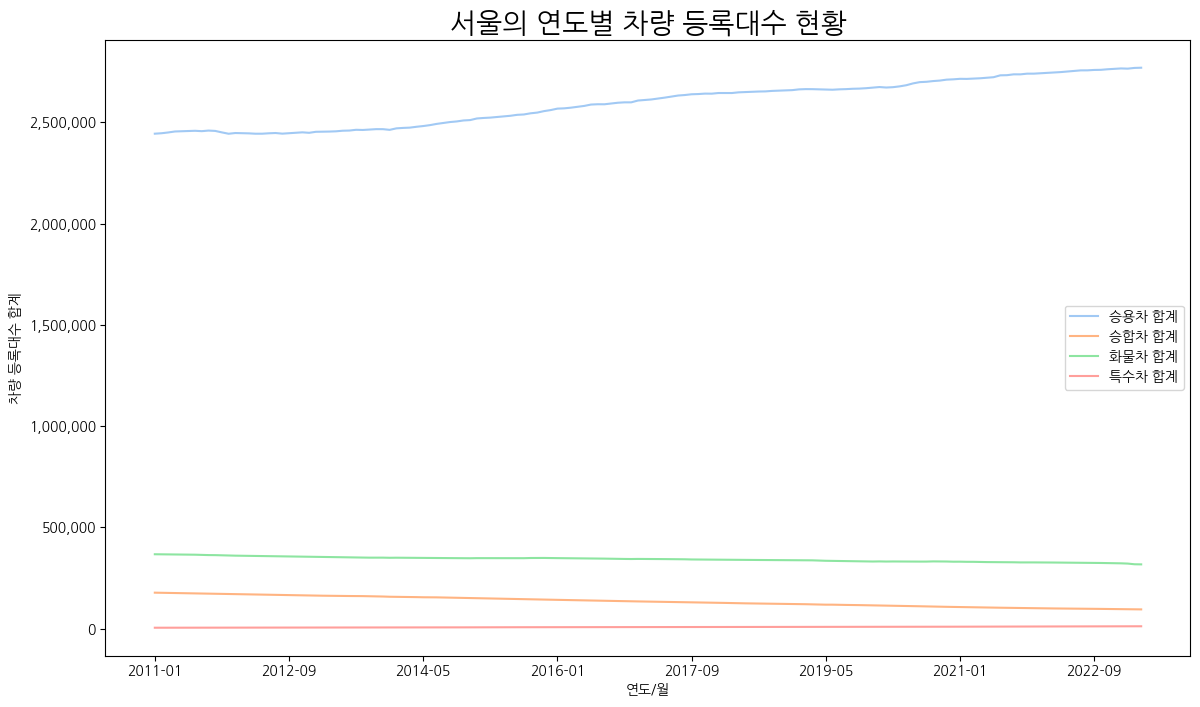

In [63]:
# 서울의 연도별 차량 등록대수 현황
sns.set_palette("pastel")
sum_seoul.plot(x = '월(Monthly)', kind = 'line', figsize = (14, 8))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('연도/월')
plt.ylabel('차량 등록대수 합계')
plt.title('서울의 연도별 차량 등록대수 현황', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\3175649777.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


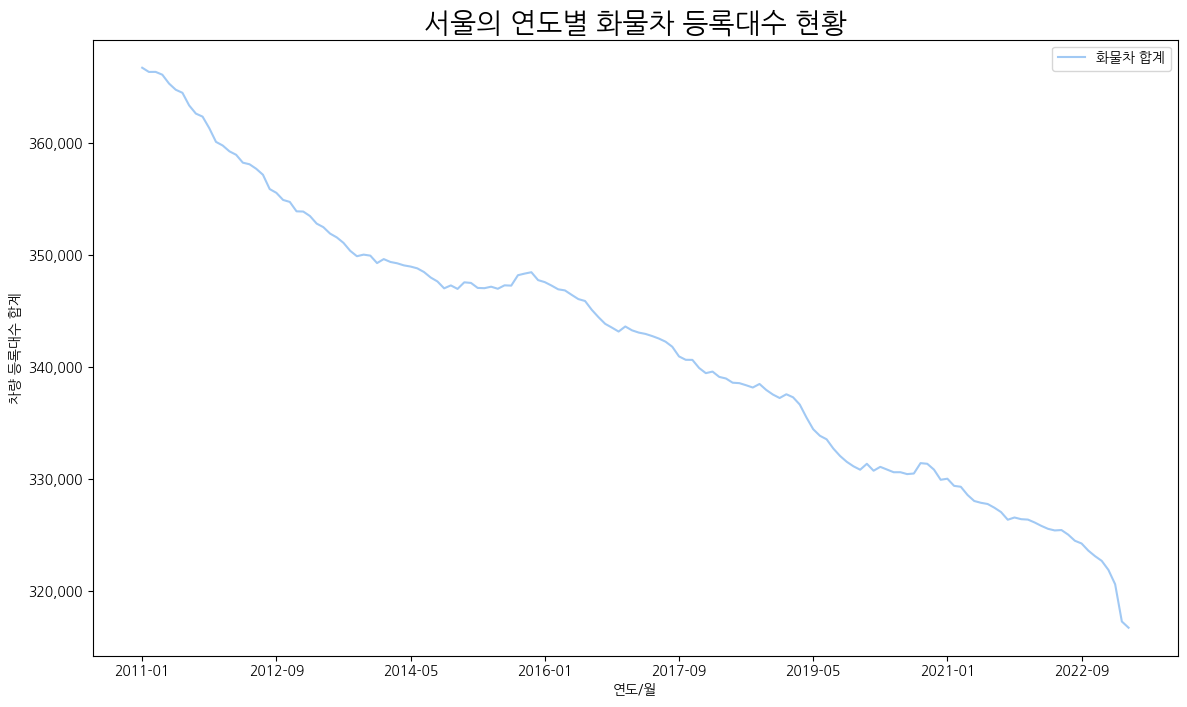

In [64]:
# 서울의 연도별 화물차 등록대수 현황
sns.set_palette("pastel")
sum_seoul.plot(x = '월(Monthly)', y = '화물차 합계', kind = 'line', figsize = (14, 8))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('연도/월')
plt.ylabel('차량 등록대수 합계')
plt.title('서울의 연도별 화물차 등록대수 현황', fontsize = 20)
plt.show()

* 앞서서 전국단위의 연도별 화물차 등록대수는 계속해서 증가였는데 반해, 서울 지역의 화물차 등록대수는 감소하는 추세

### 경기지역의 자동차 등록대수 현황파악

In [65]:
gyeonggi_df = new_df[new_df['시도명'] == '경기']
gyeonggi_df.head()

,월(Monthly),시도명,시군구,승용차 합계,승합차 합계,화물차 합계,특수차 합계
74,2011-01,경기,가평군,15272,2014,5460,75
75,2011-01,경기,고양시 덕양구,97922,7659,18086,129
76,2011-01,경기,고양시 일산동구,83420,5784,12066,132
77,2011-01,경기,고양시 일산서구,80972,5140,9607,63
78,2011-01,경기,과천시,19464,1158,2099,27


In [66]:
gyeonggi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6359 entries, 74 to 37094
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   월(Monthly)  6359 non-null   object
 1   시도명         6359 non-null   object
 2   시군구         6359 non-null   object
 3   승용차 합계      6359 non-null   int64 
 4   승합차 합계      6359 non-null   int64 
 5   화물차 합계      6359 non-null   int64 
 6   특수차 합계      6359 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 397.4+ KB


In [67]:
# 인덱스 초기화
gyeonggi_df.reset_index(drop = True, inplace = True)

In [68]:
sum_gyeonggi = gyeonggi_df[['월(Monthly)', '승용차 합계', '승합차 합계', '화물차 합계', '특수차 합계']].groupby(['월(Monthly)'], as_index = False).sum()
sum_gyeonggi

,월(Monthly),승용차 합계,승합차 합계,화물차 합계,특수차 합계
0,2011-01,3260150,263869,682488,9265
1,2011-02,3269845,263229,682951,9342
2,2011-03,3282649,262290,683660,9412
3,2011-04,3295153,261355,684418,9465
4,2011-05,3304524,260763,684873,9515
...,...,...,...,...,...
143,2022-12,5311946,190926,847730,28030
144,2023-01,5324836,190419,850112,28232
145,2023-02,5332573,190021,851836,28326
146,2023-03,5347568,188821,854665,28530


C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\2720079067.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


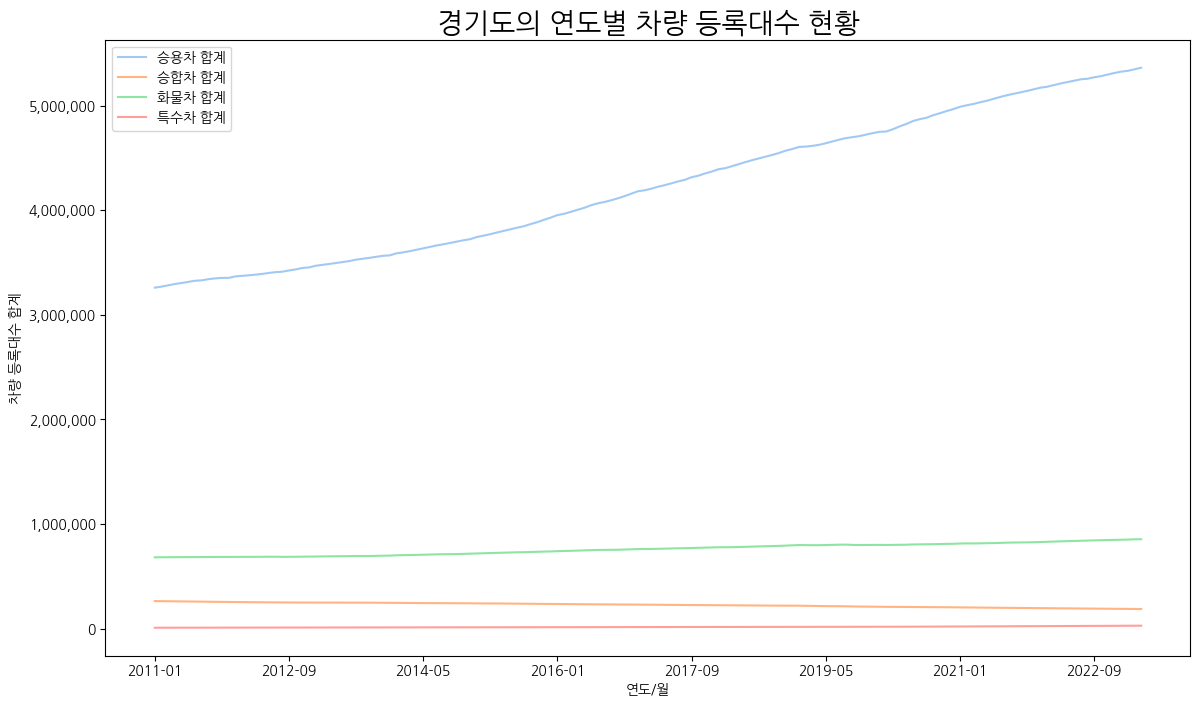

In [69]:
# 경기도의 연도별 차량 등록대수 현황
sum_gyeonggi.plot(x = '월(Monthly)', kind = 'line', figsize = (14, 8))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('연도/월')
plt.ylabel('차량 등록대수 합계')
plt.title('경기도의 연도별 차량 등록대수 현황', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\1619834422.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


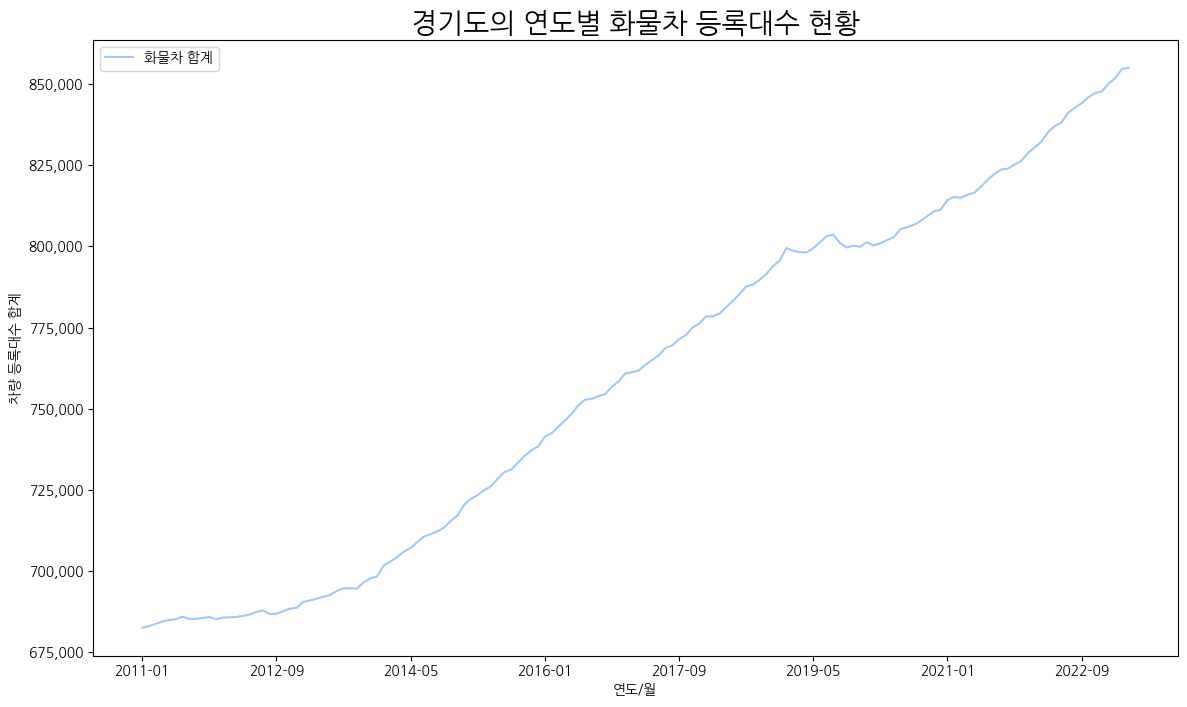

In [70]:
# 경기도의 연도별 화물차 등록대수 현황
sns.set_palette("pastel")
sum_gyeonggi.plot(x = '월(Monthly)', y = '화물차 합계', kind = 'line', figsize = (14, 8))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('연도/월')
plt.ylabel('차량 등록대수 합계')
plt.title('경기도의 연도별 화물차 등록대수 현황', fontsize = 20)
plt.show()

* 경기도는 서울과 다르게 화물차 차량등록수가 증가함을 알 수 있다.

### 서울과 경기지역을 통합했을때의 차량 등록대수 시각화

In [71]:
total_df = new_df[(new_df['시도명'] == '서울') | (new_df['시도명'] == '경기')]
total_df.head()

,월(Monthly),시도명,시군구,승용차 합계,승합차 합계,화물차 합계,특수차 합계
0,2011-01,서울,강남구,224229,10075,19198,249
1,2011-01,서울,강동구,113416,8912,17662,201
2,2011-01,서울,강북구,57889,5963,10215,42
3,2011-01,서울,강서구,148277,11073,21757,181
4,2011-01,서울,관악구,97829,7447,14344,111


In [72]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10059 entries, 0 to 37094
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   월(Monthly)  10059 non-null  object
 1   시도명         10059 non-null  object
 2   시군구         10059 non-null  object
 3   승용차 합계      10059 non-null  int64 
 4   승합차 합계      10059 non-null  int64 
 5   화물차 합계      10059 non-null  int64 
 6   특수차 합계      10059 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 628.7+ KB


In [73]:
sum_total = total_df[['월(Monthly)', '승용차 합계', '승합차 합계', '화물차 합계', '특수차 합계']].groupby(['월(Monthly)'], as_index = False).sum()
sum_total

,월(Monthly),승용차 합계,승합차 합계,화물차 합계,특수차 합계
0,2011-01,5703706,440859,1049211,13169
1,2011-02,5715597,439603,1049298,13275
2,2011-03,5732250,438179,1050012,13396
3,2011-04,5749621,436469,1050518,13514
4,2011-05,5760013,435285,1050183,13596
...,...,...,...,...,...
143,2022-12,8075676,287011,1170436,38860
144,2023-01,8090618,286247,1172008,39077
145,2023-02,8097314,285431,1172455,39237
146,2023-03,8115882,283748,1171958,39534


C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\972583026.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


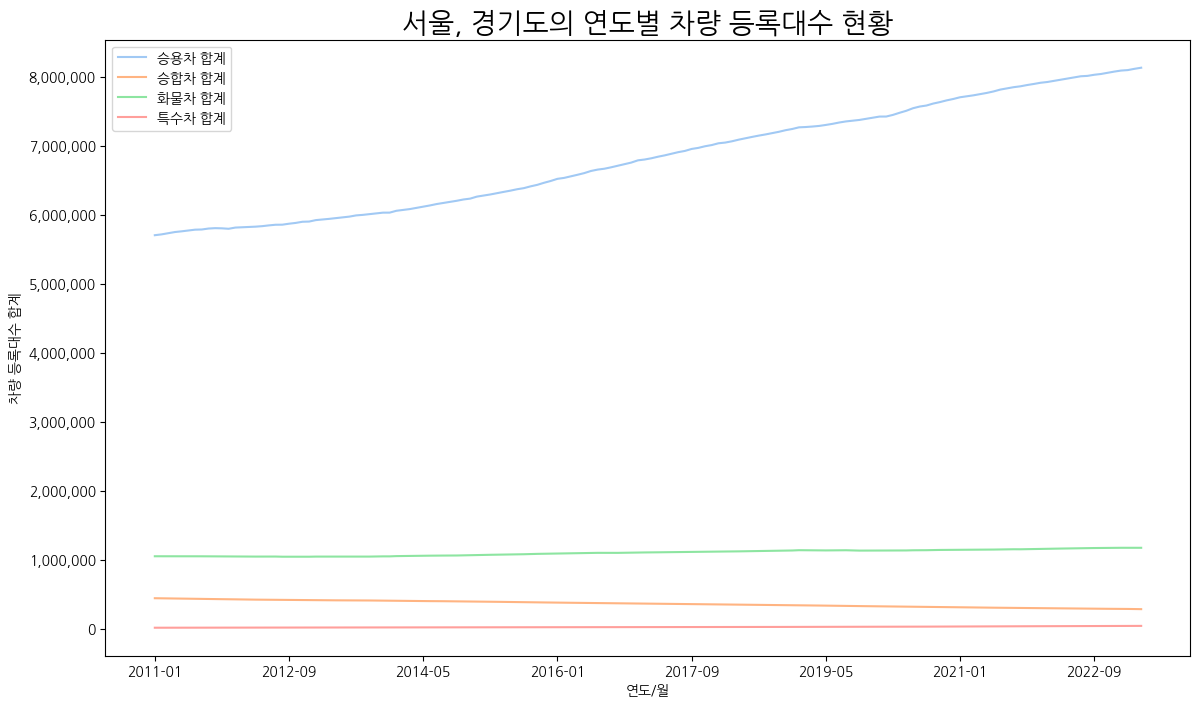

In [74]:
# 서울, 경기도의 연도별 차량 등록대수 현황
sns.set_palette("pastel")
sum_total.plot(x = '월(Monthly)', kind = 'line', figsize = (14, 8))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('연도/월')
plt.ylabel('차량 등록대수 합계')
plt.title('서울, 경기도의 연도별 차량 등록대수 현황', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_49196\3377442988.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


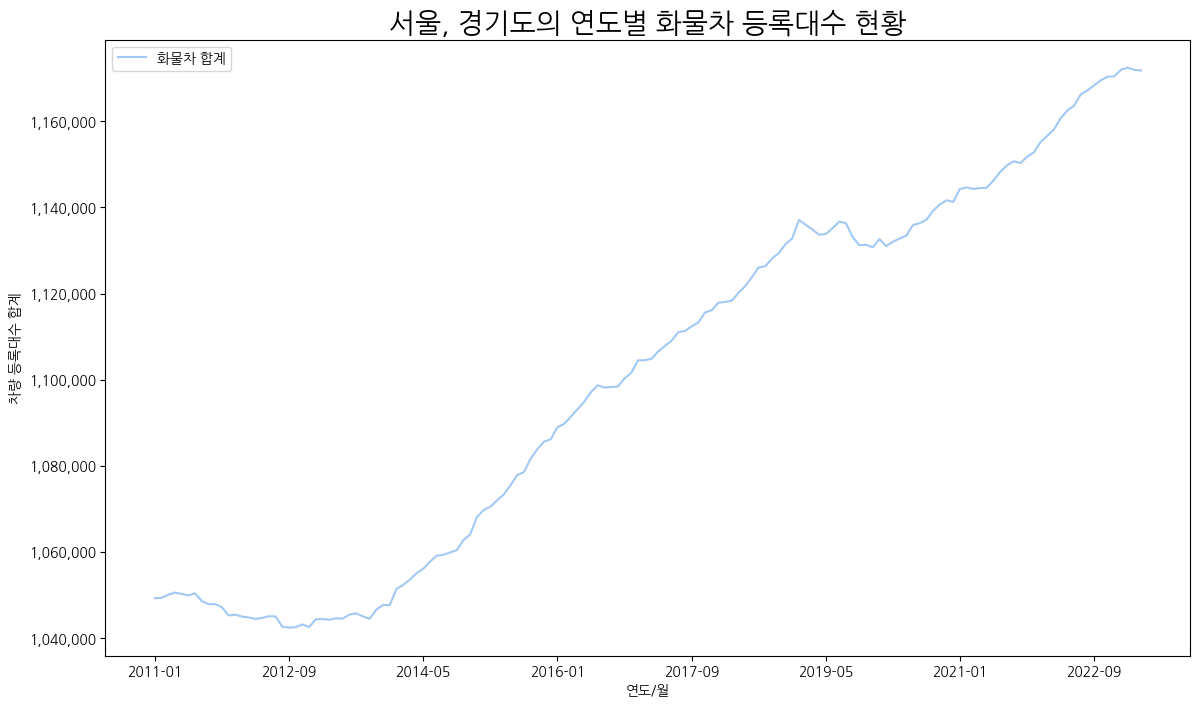

In [75]:
# 서울, 경기도의 연도별 화물차 등록대수 현황
sns.set_palette("pastel")
sum_total.plot(x = '월(Monthly)', y = '화물차 합계', kind = 'line', figsize = (14, 8))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('연도/월')
plt.ylabel('차량 등록대수 합계')
plt.title('서울, 경기도의 연도별 화물차 등록대수 현황', fontsize = 20)
plt.show()

### 연도별 차량등록대수 시각화 결과
* 차량 전체를 봤을때 승용차의 등록대수가 압도적이자, 계속해서 증가
* 화물차 역시 꾸준히 증가
### 시도별 차량등록대수 시각화 결과
* 서울지역만 봤을때 전체적인 그래프의 추이는 유사하나, 화물차 개별로 봤을 때는 꾸준히 감소중이다.
* 반대로, 경기지역은 화물차 등록대수가 꾸준하게 증가하고 있을을 알 수 있었다.
* 서울, 경기를 통합하여 시각화를 하는것이 보다 효과적인 설득이 될 것 같아 통합후 진행한 결과, 화물차가 증가하는 그래프를 도출할 수 있었다.